In [1]:
import pandas as pd
import numpy as np
from utils.data_process import input_process, res_process
from utils.search import return_res
from utils.plot import plotly_plot
from utils.algo.calculation import *
from datetime import date
from os import walk
import re
from sklearn.preprocessing import *
import matplotlib.pyplot as plt

In [2]:
# 讀入資料(好範例)
# Ticker = '2317TW'
# start_date = "2014-12-05"
# end_date = "2015-01-12"
# df = pd.read_csv(r"./data/{}.csv".format(Ticker))
# s, e = input_process.DateIndexMap(df, start_date), input_process.DateIndexMap(df, end_date)

In [2]:
# 不好範例
Ticker = '2330TW'
start_date = "2018-09-28"
end_date = "2018-10-30"
df = pd.read_csv(r"./data/{}.csv".format(Ticker))
s, e = input_process.DateIndexMap(df, start_date), input_process.DateIndexMap(df, end_date)
# s = 1604
# e = 1628

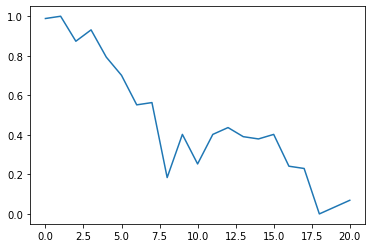

In [3]:
# 資料作圖
y = input_process.BatchScaler.min_max_scalar(np.array(df['Close'][s:e]))
x = np.array([i for i in range(len(y))])
plt.plot(x,y)

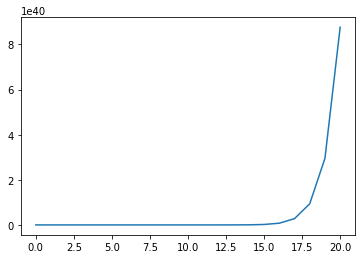

In [8]:
# fit多項式
p = np.polynomial.legendre.Legendre(poly2on(arr2polycoef(y)))
y_pred = np.array([p(i) for i in x]) # 帶入轉換後多項式
plt.plot(x, y_pred) # 作圖檢視結果

In [3]:
# 執行搜尋
# search and return res
search_res = return_res.get_sim_res(df, s, e, 'polycos_d') # a:b
    

# get res start and end
s_res, e_res = res_process.range_2_num(search_res)

 16%|█▌        | 576/3570 [00:07<00:39, 75.27it/s]


KeyboardInterrupt: 

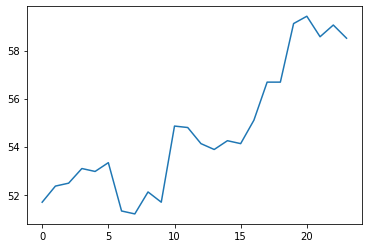

In [6]:
plt.plot(x,df['Close'][s_res:e_res])

In [5]:
# 執行搜尋
# search and return res
search_res = return_res.get_sim_res(df, s, e, 'poly_d') # a:b
    

# get res start and end
s_res, e_res = res_process.range_2_num(search_res)

AttributeError: module 'utils.data_process.input_process' has no attribute 'full_wav_scalar'

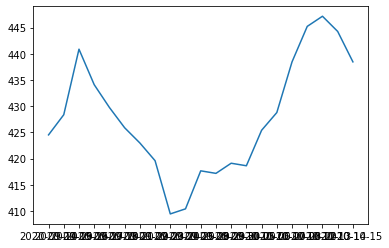

In [10]:
plt.plot(df["Date"][s_res:e_res],df['Close'][s_res:e_res])

In [10]:
df["Date"][s_res:e_res]

1378    2013-07-24
1379    2013-07-25
1380    2013-07-26
1381    2013-07-29
1382    2013-07-30
1383    2013-07-31
1384    2013-08-01
1385    2013-08-02
1386    2013-08-05
1387    2013-08-06
1388    2013-08-07
1389    2013-08-08
1390    2013-08-09
1391    2013-08-12
1392    2013-08-13
1393    2013-08-14
1394    2013-08-15
1395    2013-08-16
1396    2013-08-19
1397    2013-08-20
1398    2013-08-22
1399    2013-08-23
1400    2013-08-26
1401    2013-08-27
Name: Date, dtype: object

In [19]:
# 執行搜尋
# search and return res
search_res = return_res.get_sim_res(df, s, e, 'shape_d') # a:b
    

# get res start and end
s_res, e_res = res_process.range_2_num(search_res)

TypeError: unsupported operand type(s) for -: 'NoneType' and 'NoneType'

In [12]:
step = 0
Ticker = '2330TW'
start_date = "2020-10-13"
end_date = "2020-12-14"
df = pd.read_csv(r"./data/{}.csv".format(Ticker))
s, e = input_process.DateIndexMap(df, start_date), input_process.DateIndexMap(df, end_date)
plotly_plot.plot(df, s = s-step, e= e+step, step = step)